##  Predicting House Price based on the loan charactersitics

In [1]:
#importing basic packages for data understanding and numerical package for math operations
import pandas as pd
import numpy as np

                                    
import matplotlib.pyplot as plt     ##importing required packages for visulization and plotting 
%matplotlib inline 
                
import datetime as dt              #package required for DATE/TIME

import seaborn as sns            #set seabor graphs to a better style
sns.set(style="ticks")
sns.set_style("darkgrid")

import pandas_profiling as pf            #importing package for data auditing

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

import scipy.stats as stats  #scientific python

from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.pandas.set_option('display.max_columns',None)             #it will show all the columns
#pd.pandas.set_option('display.max_rows',None)               #it will show all the rows
import os # os.chdir(path link)                              #importing package to execute operating system functions
import re

import math

In [2]:
df=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\REGRESSION Predicting House Prices\House_Prices.csv")
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


# 1. Model Building Steps - Pre-Modeling Stage

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB




# Understanding  the data availability

In [4]:
df.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

### My  Y variable is Interest_Rate

### We are Solving this Problem by Linear Regression

 ### Auditing The Data at At File Level 

In [5]:
df.head(2)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East


In [6]:
df.size

1024

In [7]:
df.shape

(128, 8)

In [8]:
df.columns = [val.replace('.','_') for val in df.columns]

In [9]:
df.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [10]:
df.columns.value_counts().count()

8

In [11]:
df.Home.value_counts().count()

128

In [12]:
df.isna().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

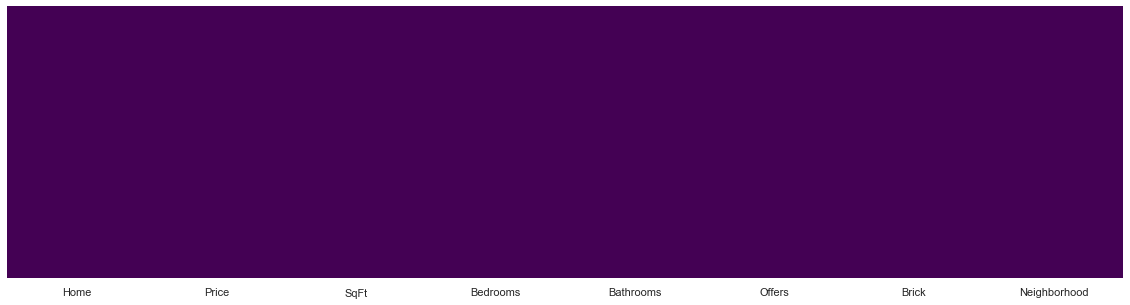

In [13]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

### Handlign missing values (Imputation of Missing values)

In [14]:
def miss_values(x):
    if x.dtype=='O':
        x=x.fillna(x.mode()[0])
        return x
    else:
        x=x.fillna(x.median())
        return x

In [15]:
df= df.apply(miss_values)

In [16]:
df.isna().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [18]:
df.head(5)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [19]:
df.Neighborhood.value_counts()

East     45
North    44
West     39
Name: Neighborhood, dtype: int64

In [20]:
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


# Understand Distribution of data  

### Histogram/Boxplot for continuous

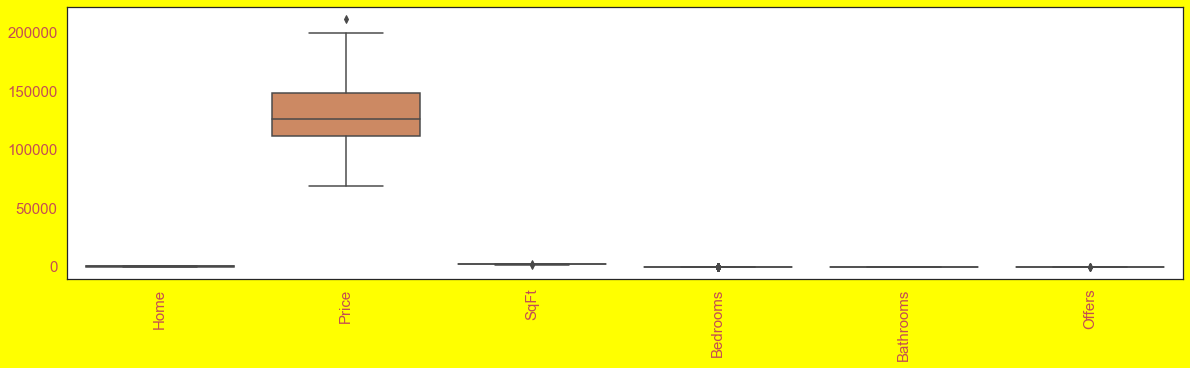

In [21]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white')
sns.boxplot(data=df.select_dtypes(include=[int,float]))
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

### Understand Relationships (correlations/associations) 

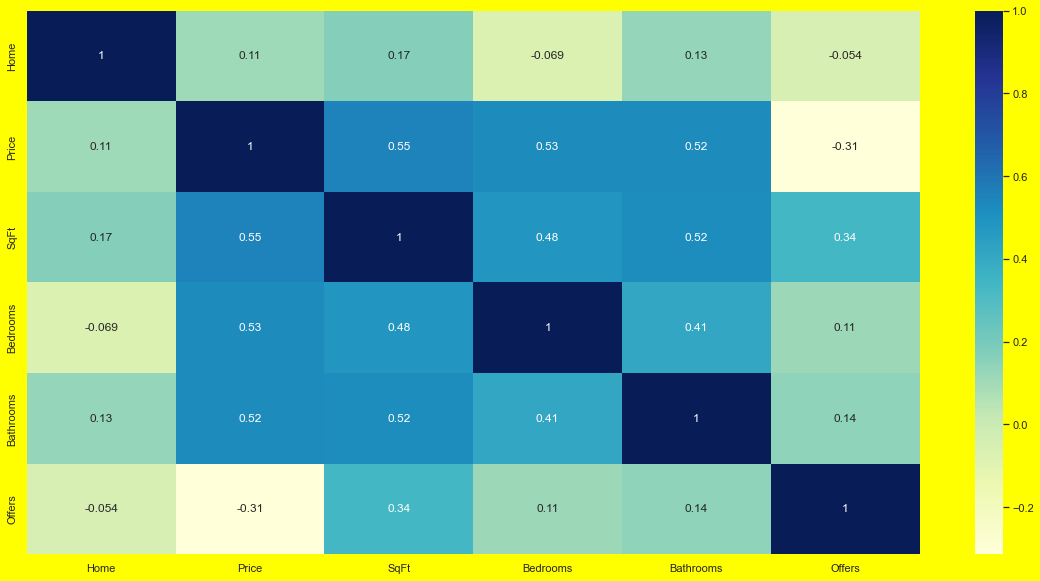

In [22]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [23]:
report_1 = pf.ProfileReport(df)

In [24]:
report_1.to_file("report_1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
df =df.drop(columns=['Home'],axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         128 non-null    int64 
 1   SqFt          128 non-null    int64 
 2   Bedrooms      128 non-null    int64 
 3   Bathrooms     128 non-null    int64 
 4   Offers        128 non-null    int64 
 5   Brick         128 non-null    object
 6   Neighborhood  128 non-null    object
dtypes: int64(5), object(2)
memory usage: 7.1+ KB


# 2. Model Building Steps - Modeling Stage

### Handling Outliers--Cross sectional data

In [27]:
def outliers(x):
    if ((x.dtype=='int')| (x.dtype=='float')):
        Q1=x.quantile(0.25)
        Q3=x.quantile(0.75)
        IQR=Q3-Q1
        x=x.clip(lower=Q1-1.5*IQR,upper=Q3+1.5*IQR)                                      
    else :
        x
    return x

In [28]:
df=df.apply(outliers)
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,Yes,East
124,147900,2160,4,3,3,Yes,East
125,113500,2070,2,2,2,No,North
126,149900,2020,3,3,1,No,West


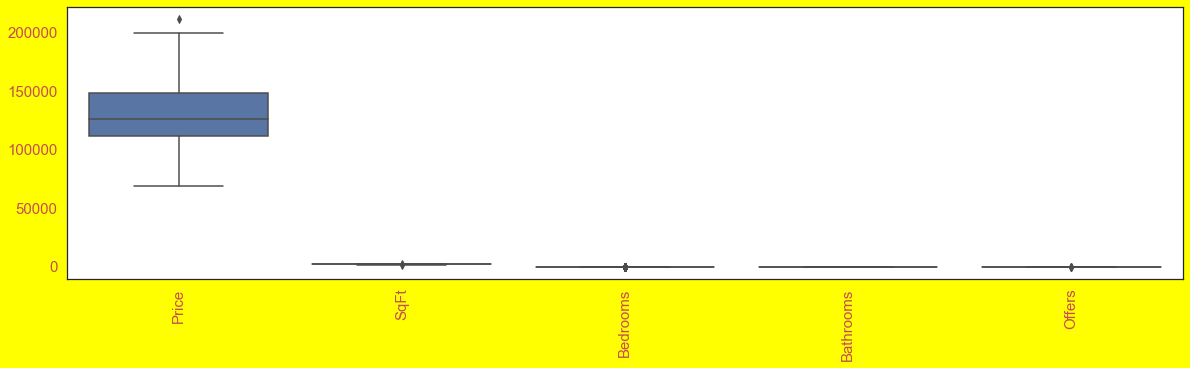

In [29]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white')
sns.boxplot(data=df.select_dtypes(include=[int,float]))
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

In [30]:
print(df.Price.quantile(0.01))
print(df.Price.min())
print(df.Price.quantile(0.99))
print(df.Price.max())

81570.0
69100
196476.00000000006
211200


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         128 non-null    int64 
 1   SqFt          128 non-null    int64 
 2   Bedrooms      128 non-null    int64 
 3   Bathrooms     128 non-null    int64 
 4   Offers        128 non-null    int64 
 5   Brick         128 non-null    object
 6   Neighborhood  128 non-null    object
dtypes: int64(5), object(2)
memory usage: 7.1+ KB


### Converting categorical variables into numercal variables--- Ordinal variables (Label encoding)

In [32]:
for var in df.select_dtypes(include='object').columns:
     print("\n" + var)
     print(df[var].value_counts())


Brick
No     86
Yes    42
Name: Brick, dtype: int64

Neighborhood
East     45
North    44
West     39
Name: Neighborhood, dtype: int64


In [33]:
df1= pd.get_dummies(df,columns=['Brick','Neighborhood'],drop_first=True) # converting categorical into numerical

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Price               128 non-null    int64
 1   SqFt                128 non-null    int64
 2   Bedrooms            128 non-null    int64
 3   Bathrooms           128 non-null    int64
 4   Offers              128 non-null    int64
 5   Brick_Yes           128 non-null    uint8
 6   Neighborhood_North  128 non-null    uint8
 7   Neighborhood_West   128 non-null    uint8
dtypes: int64(5), uint8(3)
memory usage: 5.5 KB


### Assumptions of the techniques--Normality/Linearity/No outliers/No Multicollinieirty/Homoscedasticity

C:\Users\putta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

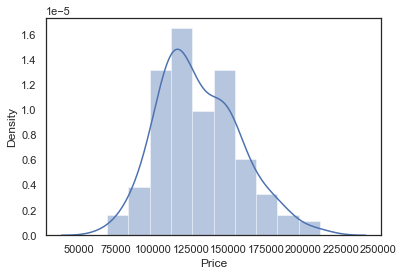

In [35]:
sns.distplot(df1.Price) # left skewness

C:\Users\putta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

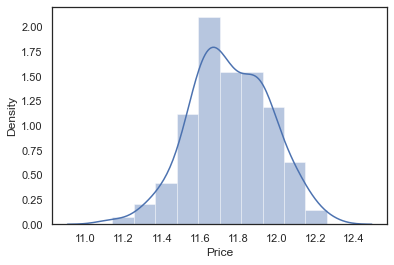

In [36]:
sns.distplot(np.log(df1.Price))

In [37]:
df1['lnPrice'] = np.log(df1.Price)

In [38]:
df1=df1.drop('Price',axis=1)

In [39]:
df1

,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,lnPrice
0,1790,2,2,2,0,0,0,11.646582
1,2030,4,2,3,0,0,0,11.645707
2,1740,3,2,1,0,0,0,11.650947
3,1980,3,2,3,0,0,0,11.458469
4,2130,3,3,3,0,0,0,11.693579
...,...,...,...,...,...,...,...,...
123,1900,3,3,3,1,0,0,11.692744
124,2160,4,3,3,1,0,0,11.904292
125,2070,2,2,2,0,1,0,11.639558
126,2020,3,3,1,0,0,1,11.917724


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SqFt                128 non-null    int64  
 1   Bedrooms            128 non-null    int64  
 2   Bathrooms           128 non-null    int64  
 3   Offers              128 non-null    int64  
 4   Brick_Yes           128 non-null    uint8  
 5   Neighborhood_North  128 non-null    uint8  
 6   Neighborhood_West   128 non-null    uint8  
 7   lnPrice             128 non-null    float64
dtypes: float64(1), int64(4), uint8(3)
memory usage: 5.5 KB


### Feature engineering

- Based on the data, you may drop variables based on below reasons
    - If the variable have lots of missings (>25%)
    - if categorical Variable with lots categories(>20)
    - Variable with near zero variance (CV<0.05)
    - Unique variables/Keys/Names/Emaiid/Phone number

### Checking Linearity

In [41]:
corre_y = df1.corrwith(df1.lnPrice)

In [42]:
#corre_y.to_csv('corre_y.csv')

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SqFt                128 non-null    int64  
 1   Bedrooms            128 non-null    int64  
 2   Bathrooms           128 non-null    int64  
 3   Offers              128 non-null    int64  
 4   Brick_Yes           128 non-null    uint8  
 5   Neighborhood_North  128 non-null    uint8  
 6   Neighborhood_West   128 non-null    uint8  
 7   lnPrice             128 non-null    float64
dtypes: float64(1), int64(4), uint8(3)
memory usage: 5.5 KB


In [44]:
df1.columns

Index(['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_Yes',
       'Neighborhood_North', 'Neighborhood_West', 'lnPrice'],
      dtype='object')

In [45]:
df1=df1[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_Yes','Neighborhood_North', 'Neighborhood_West', 'lnPrice']]

In [46]:
cv= df1.apply(lambda x:np.std(x)/np.mean(x))
cv

SqFt                  0.105323
Bedrooms              0.239168
Bathrooms             0.209576
Offers                0.413145
Brick_Yes             1.430950
Neighborhood_North    1.381699
Neighborhood_West     1.510646
lnPrice               0.017440
dtype: float64

### Multicolinieity by VIF

In [47]:
df2 = df1[df1.columns.difference(['lnPrice','SqFt','Bathrooms','Bedrooms'])]

In [48]:
df2.values # data frame to arrays

array([[0, 0, 0, 2],
       [0, 0, 0, 3],
       [0, 0, 0, 1],
       [0, 0, 0, 3],
       [0, 0, 0, 3],
       [0, 1, 0, 2],
       [1, 0, 1, 3],
       [0, 0, 1, 2],
       [0, 0, 0, 3],
       [0, 0, 0, 3],
       [1, 0, 0, 3],
       [1, 0, 0, 2],
       [0, 1, 0, 4],
       [1, 1, 0, 5],
       [0, 0, 1, 4],
       [0, 0, 1, 1],
       [1, 0, 0, 4],
       [0, 1, 0, 4],
       [1, 0, 0, 1],
       [1, 0, 1, 2],
       [0, 0, 0, 3],
       [0, 1, 0, 4],
       [0, 1, 0, 3],
       [1, 1, 0, 3],
       [1, 0, 0, 2],
       [0, 1, 0, 3],
       [0, 0, 1, 3],
       [0, 0, 0, 2],
       [0, 1, 0, 3],
       [1, 0, 1, 1],
       [1, 0, 1, 3],
       [1, 1, 0, 2],
       [1, 0, 0, 3],
       [1, 0, 0, 4],
       [0, 1, 0, 3],
       [0, 1, 0, 3],
       [0, 1, 0, 2],
       [0, 0, 1, 4],
       [0, 0, 1, 1],
       [0, 1, 0, 2],
       [0, 0, 0, 1],
       [0, 0, 1, 2],
       [0, 0, 0, 3],
       [1, 0, 0, 1],
       [1, 0, 1, 2],
       [0, 0, 0, 3],
       [0, 1, 0, 2],
       [0, 1,

In [49]:
v1= pd.Series(df2.columns,name='variables')
v1

0             Brick_Yes
1    Neighborhood_North
2     Neighborhood_West
3                Offers
Name: variables, dtype: object

In [50]:
v2 = pd.Series([variance_inflation_factor(df2.values,i) for i in range(0,df2.shape[1])],name='vif')
v2   

0    1.421890
1    2.034330
2    1.440907
3    2.770734
Name: vif, dtype: float64

In [51]:
vif_values= pd.concat([v1,v2],axis=1)
vif_values

,variables,vif
0,Brick_Yes,1.421890
1,Neighborhood_North,2.034330
2,Neighborhood_West,1.440907
3,Offers,2.770734


In [52]:
vif_values= vif_values.sort_values(by='vif',ascending=False)
vif_values

,variables,vif
3,Offers,2.770734
1,Neighborhood_North,2.034330
2,Neighborhood_West,1.440907
0,Brick_Yes,1.421890


In [53]:
vif = pd.DataFrame()
vif['Features'] = df2.columns
vif['VIF'] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Offers,2.77
1,Neighborhood_North,2.03
2,Neighborhood_West,1.44
0,Brick_Yes,1.42


In [54]:
df_final=df1[df1.columns.difference(['SqFt','Bathrooms','Bedrooms'])]
df_final

,Brick_Yes,Neighborhood_North,Neighborhood_West,Offers,lnPrice
0,0,0,0,2,11.646582
1,0,0,0,3,11.645707
2,0,0,0,1,11.650947
3,0,0,0,3,11.458469
4,0,0,0,3,11.693579
...,...,...,...,...,...
123,1,0,0,3,11.692744
124,1,0,0,3,11.904292
125,0,1,0,2,11.639558
126,0,0,1,1,11.917724


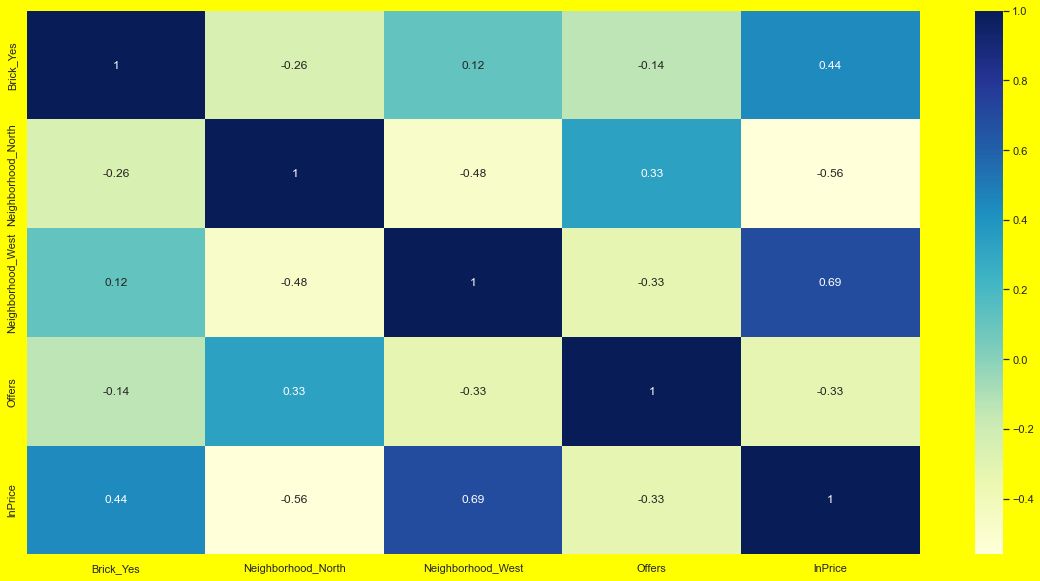

In [55]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')
sns.heatmap(df_final.corr(), cmap="YlGnBu", annot = True)
plt.show()

###  Splitting the data into train & Test

In [56]:
train,test =train_test_split(df_final,test_size=0.3,random_state=123)

In [57]:
train.head(5)

,Brick_Yes,Neighborhood_North,Neighborhood_West,Offers,lnPrice
79,0,0,1,1,11.874787
104,0,0,0,4,11.318126
60,0,0,1,1,12.105700
21,0,1,0,4,11.642198
11,1,0,0,2,11.719940


In [58]:
test.head(5)

,Brick_Yes,Neighborhood_North,Neighborhood_West,Offers,lnPrice
4,0,0,0,3,11.693579
123,1,0,0,3,11.692744
90,0,0,1,2,11.871299
82,1,0,1,1,12.012488
42,0,0,0,3,11.567414


Linear Regression					

	- variable significance			looking at P-Value	
	- final mathematical equation				
	- Important Drivers (positive/negative)				
	- Check the drivers signs with orignal correlations with Y				
    
	Metrics				
		R-square/Adj Square			
		MSE/RMSE/MAPE/RMSPE			
		Corr(Actual, pred)			
		Decile Analysis (Rank Ordering)			
        
	Checks				
		Errors should follow normal distribution			
		Corr(Actual, Errors) ~0			
		no multicollineirity on final list of variables			


In [59]:
import statsmodels.formula.api as smf

In [60]:
equation = 'lnPrice~'+'+'.join(train.columns.difference(['SqFt','Bathrooms','Bedrooms','lnPrice','Offers']))
equation

'lnPrice~Brick_Yes+Neighborhood_North+Neighborhood_West'

In [61]:
equation

'lnPrice~Brick_Yes+Neighborhood_North+Neighborhood_West'

In [62]:
ols_model=smf.ols(formula = equation ,data= train ).fit()

In [63]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                lnPrice   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     47.85
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           3.29e-18
Time:                        23:05:50   Log-Likelihood:                 59.728
No. Observations:                  89   AIC:                            -111.5
Df Residuals:                      85   BIC:                            -101.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.6561      0

In [64]:
train_pred = np.exp(ols_model.predict(train))
test_pred = np.exp(ols_model.predict(test))
train_act = np.exp(train.lnPrice)
test_act = np.exp(test.lnPrice) 

In [65]:
print('train_MAPE:', np.mean(np.abs(train_act- train_pred)/train_act))
print('test_MAPE:', np.mean(np.abs(test_act- test_pred)/test_act))

train_MAPE: 0.09763938010714035
test_MAPE: 0.09066912028679394


In [66]:
print('train_RMSE:', np.sqrt(np.mean((train_act- train_pred)**2)))
print('test_RMSE:', np.sqrt(np.mean((test_act- test_pred)**2)))

train_RMSE: 15471.550112602603
test_RMSE: 14828.459995097304


In [67]:
print('train_corr:', np.corrcoef(train_act, train_pred)[1][0])
print('test_corr:', np.corrcoef(test_act, test_pred)[1][0])

train_corr: 0.8145849165380358
test_corr: 0.8284252255314257


C:\Users\putta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

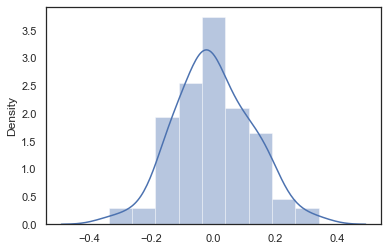

In [68]:
sns.distplot(ols_model.resid)

ln_Interest_Rate =7.5067-0.0071*FICO+0.0505*Inquiries_in_the_Last_6_Months+0.0493*Loan_Purpose_debt_consolidation
Interest_Rate = exp(ln_Interest_Rate)

# Implementation on new customer

In [69]:
Brick_Yes = 1
Neighborhood_North = 1
Neighborhood_West = 0

In [70]:
print('PRICE for given application:',np.exp(11.6561-0.1350*Brick_Yes-0.0808*Neighborhood_North+0.2644*Neighborhood_West))

PRICE for given application: 92994.90633090535
